# Visualizing Decision Tree

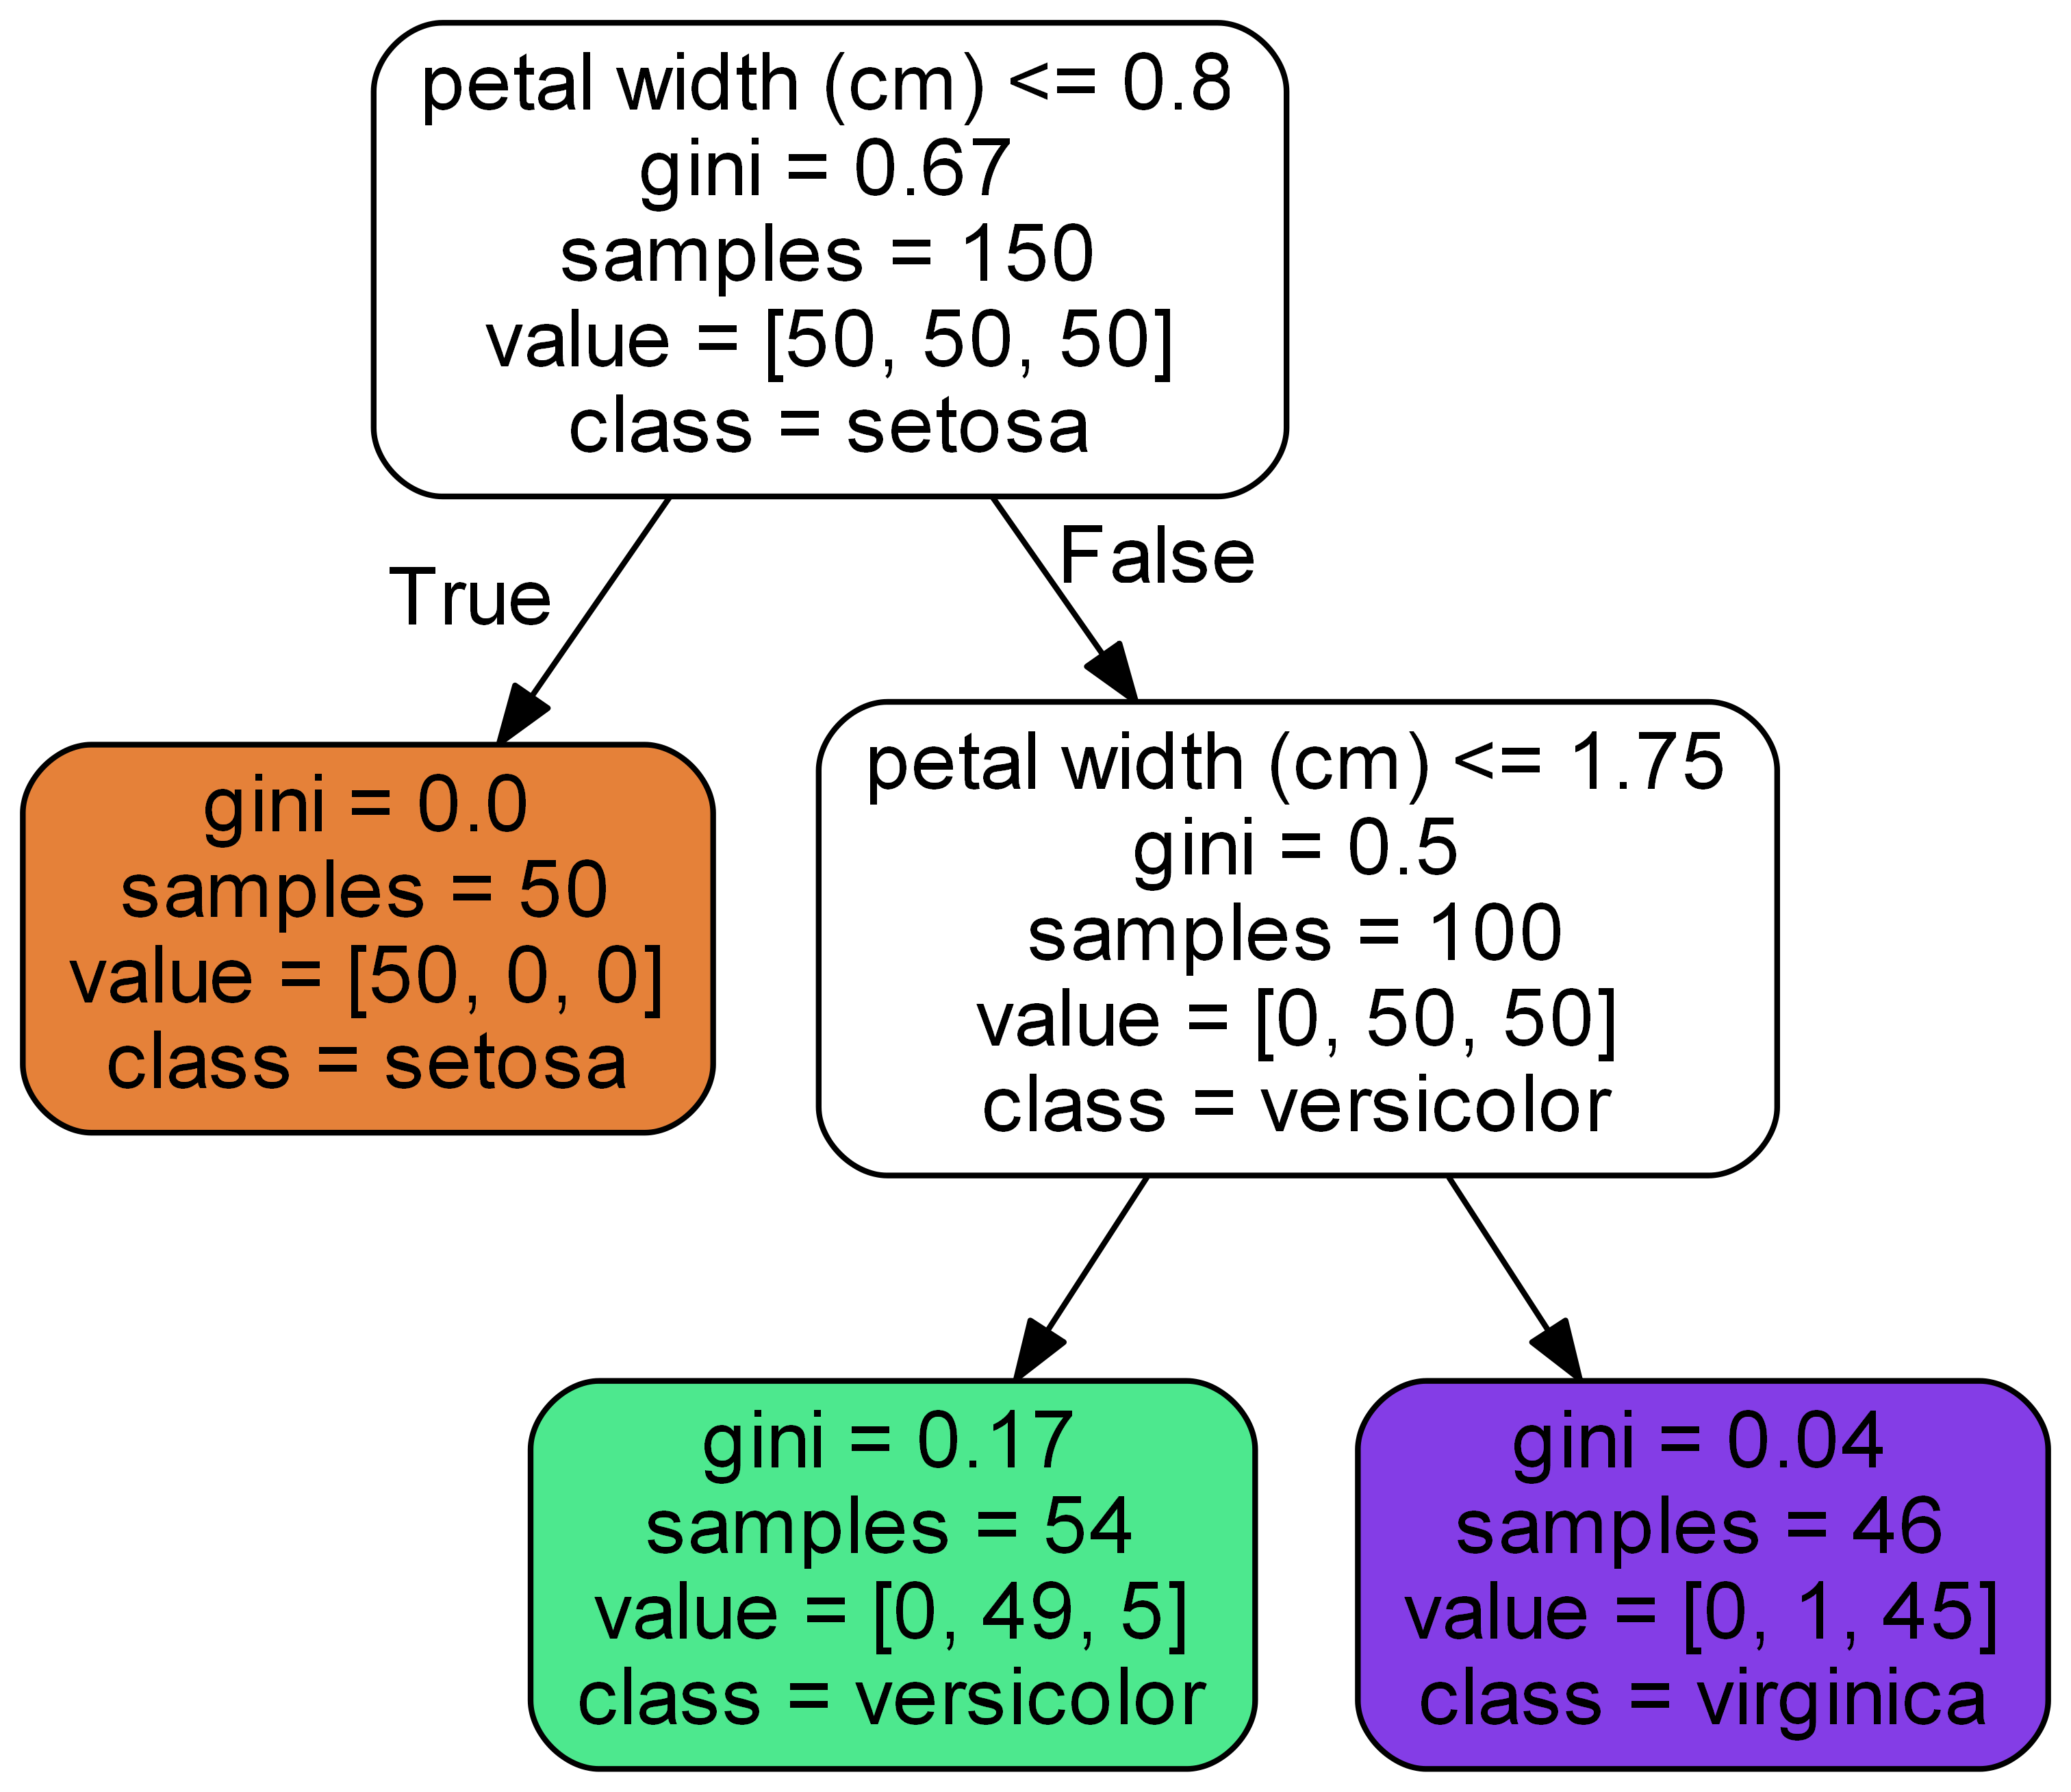

In [1]:
#Import Libraries and Load Dataset
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
iris = load_iris()


# Model 
clf = DecisionTreeClassifier(max_depth = 2)


# Train
clf.fit(iris.data, iris.target)


#Import graphviz and add to your path
from sklearn.tree import export_graphviz
import os
os.environ["PATH"] += os.pathsep +'C:/Users/noopa/Anaconda3/pkgs/graphviz-2.38-hfd603c8_2/Library/bin/graphviz'


# Export as dot file
export_graphviz(clf,out_file='tree1.dot', 
                feature_names = iris.feature_names,
                class_names = iris.target_names,
                rounded = True, proportion = False, 
                precision = 2, filled = True)


# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree1.dot', '-o', 'tree1.png', '-Gdpi=600'])


# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree1.png')

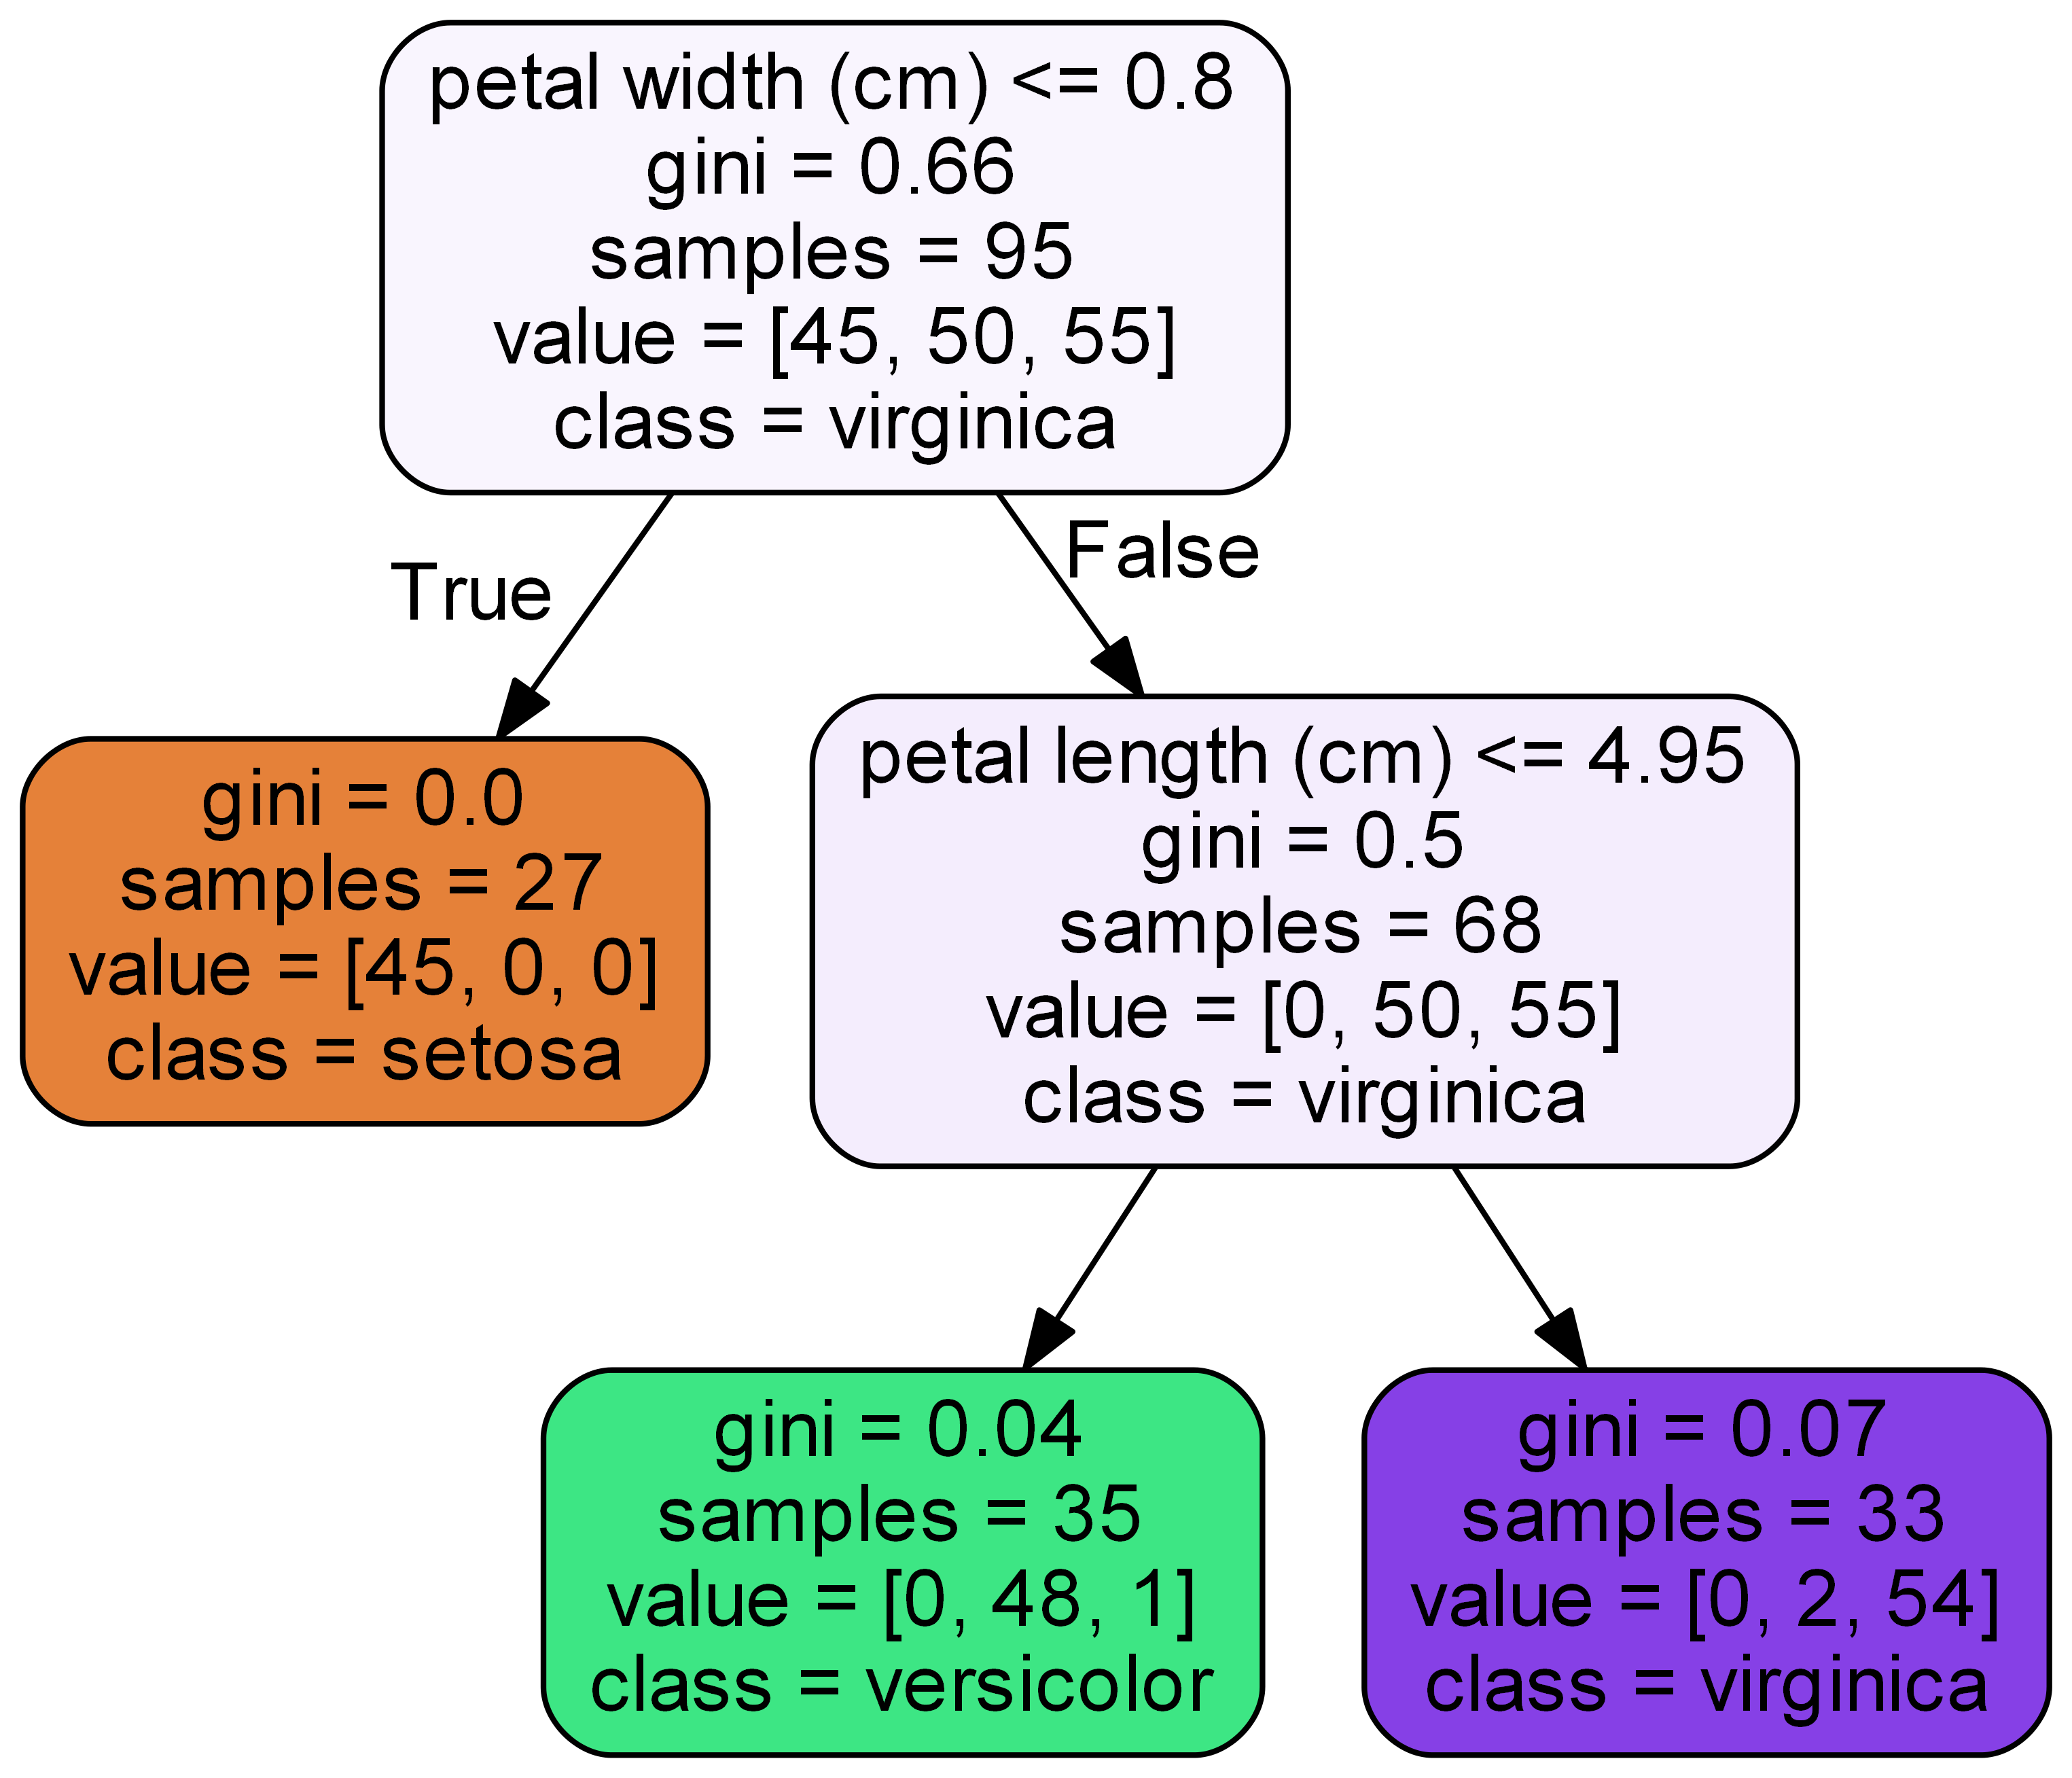

In [2]:
#Import Libraries and Load Dataset
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
iris = load_iris()

# Model (can also use single decision tree)
model =  RandomForestClassifier(max_depth = 2)

# Train
model.fit(iris.data, iris.target)

# Extract single tree
estimator = model.estimators_[5]


from sklearn.tree import export_graphviz
import os
os.environ["PATH"] += os.pathsep +'C:/Users/noopa/Anaconda3/pkgs/graphviz-2.38-hfd603c8_2/Library/bin/graphviz'


# Export as dot file
export_graphviz(estimator, out_file='tree2.dot', 
                feature_names = iris.feature_names,
                class_names = iris.target_names,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree2.dot', '-o', 'tree2.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree2.png')

# Exercise

1. Repeat the visualization of the Decision Tree with ``wine dataset in sklearn``.  How does the ``max_depth``, ``max_features``, and ``n_estimators`` affect the results?


.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

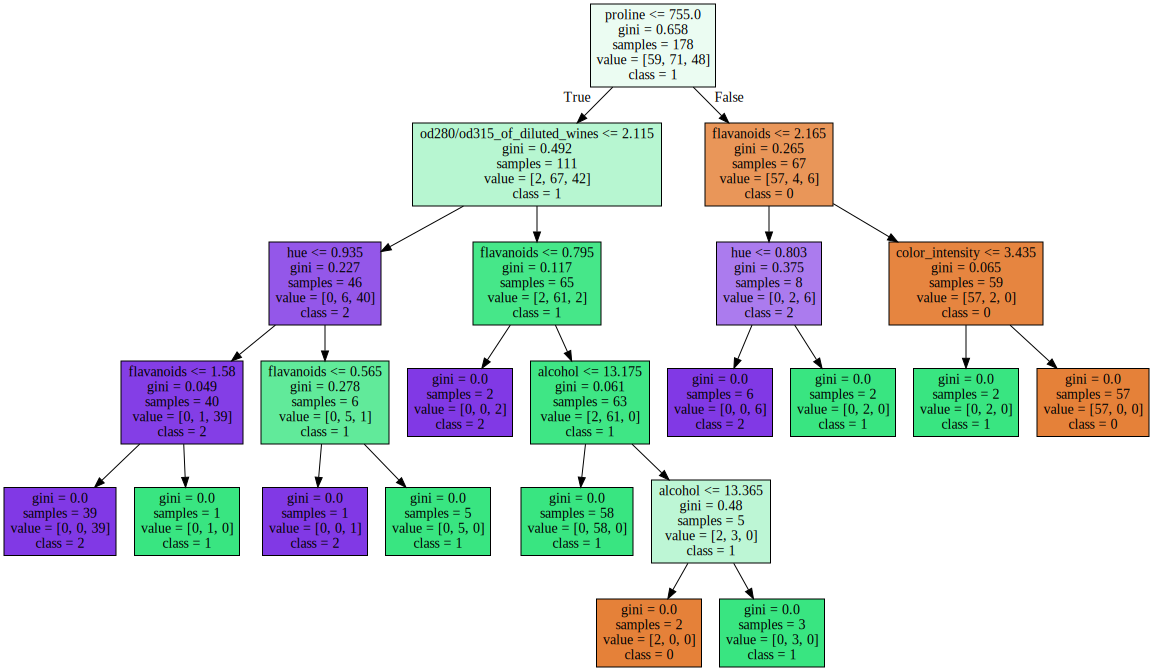

In [3]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.datasets import load_wine
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
# load dataset
data = load_wine()

import os
os.environ["PATH"] += os.pathsep +'C:/Users/noopa/Anaconda3/pkgs/graphviz-2.38-hfd603c8_2/Library/bin/graphviz'

# feature matrix
X = data.data

# target vector
y = data.target

# class labels
labels = data.feature_names

# print dataset description
print(data.DESCR)
estimator = DecisionTreeClassifier()
estimator.fit(X, y)

graph = Source(tree.export_graphviz(estimator, out_file=None
   , feature_names=labels, class_names=['0', '1', '2'] 
   , filled = True))
display(SVG(graph.pipe(format='svg')))